In [17]:
import nltk
import re
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [18]:
messages = pd.read_csv('SMS_spam_collection/SMSSpamCollection', sep='\t', names=['label', 'SMS'])
messages

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [40]:
ps = PorterStemmer()
lmtzr = WordNetLemmatizer()
cleansed_messages_lmtzr = []
cleansed_messages_ps = []
for i in range(len(messages)):
    ### Remove any character apart from alphabets
    messages_alpha = re.sub('[^a-zA-Z]', ' ',messages.loc[i,'SMS'])
    ### Lower the case of all characters
    messages_alpha_lower = messages_alpha.lower()
    ### Split the messages into individual words
    messages_alpha_split = messages_alpha_lower.split()
    ### Removal of stopwords from the messages
    ### Case 1- PorterStemmer
    messages_without_stopwords_ps = [ps.stem(word) 
                          for word in messages_alpha_split
                          if word not in set(stopwords.words('english'))]
    ### Case 2- WordNetLemmatizer
    messages_without_stopwords_lmtzr = [lmtzr.lemmatize(word) 
                          for word in messages_alpha_split
                          if word not in set(stopwords.words('english'))]
    ### Join the words to form the message
    messages_final_ps = " ". join(messages_without_stopwords_ps)
    messages_final_lmtzr = " ". join(messages_without_stopwords_lmtzr)
    ### Append all the messages into a new list
    cleansed_messages_ps.append(messages_final_ps)
    cleansed_messages_lmtzr.append(messages_final_lmtzr)

In [42]:
print(len(cleansed_messages_ps), len(cleansed_messages_lmtzr))

5572 5572


In [48]:
### Creating a bag of words and tf-idf vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
### Select most common 2500 words
cv = CountVectorizer(max_features=2500)
tfidf = TfidfVectorizer(max_features=2500)

#### 4 cases here
### Case 1:--------> Stemming and CountVectorizer
X_ps_cv = cv.fit_transform(cleansed_messages_ps).toarray()
### Case 2:--------> Lemmatization and CountVectorizer
X_lmtzr_cv = cv.fit_transform(cleansed_messages_lmtzr).toarray()
### Case 3:--------> Stemming and TfDifVectorizer
X_ps_tfidf = tfidf.fit_transform(cleansed_messages_ps).toarray()
### Case 4:--------> Lemmatization and TfDifVectorizer
X_lmtzr_tfidf = tfidf.fit_transform(cleansed_messages_lmtzr).toarray()

In [49]:
### Creating dummy variables for label column
y = pd.get_dummies(messages['label'], drop_first= True)

In [51]:
### Train_test_split
from sklearn.model_selection import train_test_split
X_train_ps_cv, X_test_ps_cv, y_train_ps_cv, y_test_ps_cv = train_test_split(X_ps_cv, y,
                                                                            test_size=0.2,
                                                                            random_state=42)
X_train_lmtzr_cv, X_test_lmtzr_cv, y_train_lmtzr_cv, y_test_lmtzr_cv = train_test_split(X_lmtzr_cv, y,
                                                                            test_size=0.2,
                                                                            random_state=42)
X_train_ps_tfidf, X_test_ps_tfidf, y_train_ps_tfidf, y_test_ps_tfidf = train_test_split(X_ps_tfidf, y,
                                                                            test_size=0.2,
                                                                            random_state=42)
X_train_lmtzr_tfidf, X_test_lmtzr_tfidf, y_train_lmtzr_tfidf, y_test_lmtzr_tfidf = train_test_split(X_lmtzr_tfidf, y,
                                                                            test_size=0.2,
                                                                            random_state=42)

### Model Building
from sklearn.naive_bayes import MultinomialNB
mNB = MultinomialNB()
spam_detect_model_1 =mNB.fit(X_train_ps_cv, y_train_ps_cv)
y_pred_ps_cv = spam_detect_model.predict(X_test_ps_cv)

spam_detect_model_2 =mNB.fit(X_train_lmtzr_cv, y_train_lmtzr_cv)
y_pred_lmtzr_cv = spam_detect_model.predict(X_test_lmtzr_cv)

spam_detect_model_3 =mNB.fit(X_train_ps_tfidf, y_train_ps_tfidf)
y_pred_ps_tfidf = spam_detect_model.predict(X_test_ps_tfidf)

spam_detect_model_4 =mNB.fit(X_train_lmtzr_tfidf, y_train_lmtzr_tfidf)
y_pred_lmtzr_tfidf = spam_detect_model.predict(X_test_lmtzr_tfidf)

F:\anconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

Text(0.5, 1.0, 'Lemmatization+TfIdfVectorizer')

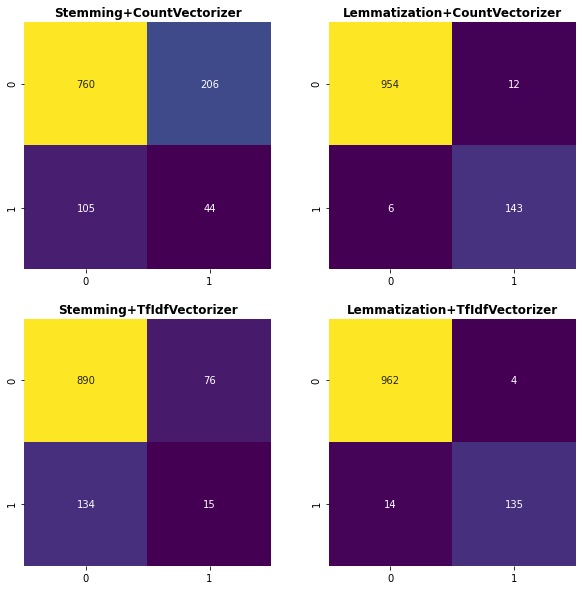

In [63]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat_1 = confusion_matrix(y_test_ps_cv, y_pred_ps_cv)
mat_2 = confusion_matrix(y_test_lmtzr_cv, y_pred_lmtzr_cv)
mat_3 = confusion_matrix(y_test_ps_tfidf, y_pred_ps_tfidf)
mat_4 = confusion_matrix(y_test_lmtzr_tfidf, y_pred_lmtzr_tfidf)

fig = plt.figure(figsize = (10,10)) # width x height
ax1 = fig.add_subplot(2, 2, 1) # row, column, position
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.heatmap(mat_1, ax=ax1, annot=True, square=True, cmap='viridis', fmt='g', cbar=False)
ax1.set_title("Stemming+CountVectorizer", weight='bold')
sns.heatmap(mat_2, ax=ax2, annot=True, square=True, cmap='viridis', fmt='g', cbar=False)
ax2.set_title("Lemmatization+CountVectorizer", weight='bold')
sns.heatmap(mat_3, ax=ax3, annot=True, square=True, cmap='viridis', fmt='g', cbar=False)
ax3.set_title("Stemming+TfIdfVectorizer", weight='bold')
sns.heatmap(mat_4, ax=ax4, annot=True, square=True, cmap='viridis', fmt='g', cbar=False)
ax4.set_title("Lemmatization+TfIdfVectorizer", weight='bold')

Here, we don't want our model to classify a **non-spam** message as **spam** since it might have some important messages. However, it is ok to classify a **spam** as **non-spam**. So, we want our model to lower **[1 0]** of the confusion matrix as much as possible.

#### Outcome
**Lemmatizatio+CountVectorizer** yields the best model amongst all.